Introduction: 
Going to analyse the Regression data of insurance charges on how much money they got for insurance based on their Age,Sex,children, smoker,region,bmi. 
Algorithms used :- 
    Linear Regression,
    Decision Tree,
    Random Forest,
    KNN(KNearest Neighbours),
    Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse Dataset

In [2]:
data=pd.read_csv(r'C:\Users\rahuj\Downloads\insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Text(0.5, 1.0, 'Sex VS Charges')

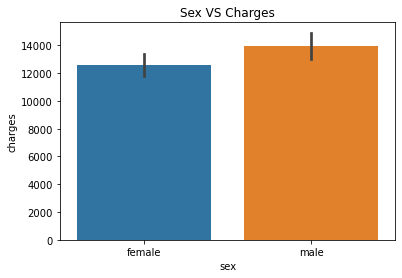

In [3]:
sns.barplot(x='sex',y='charges',data=data)
plt.title('Sex VS Charges')

Text(0.5, 1.0, 'Age VS Charges')

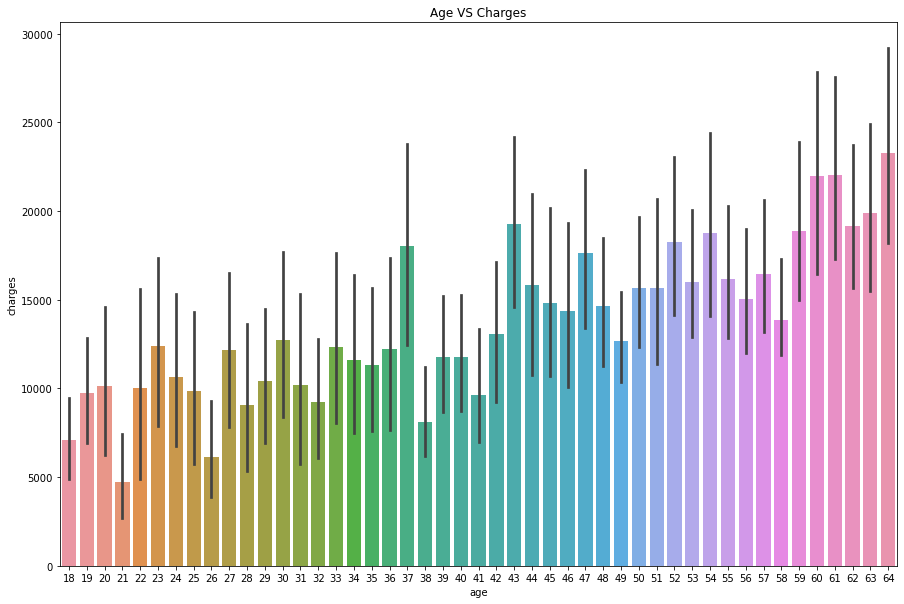

In [4]:
plt.figure(figsize=(15,10))
sns.barplot(x='age',y='charges',data=data)
plt.title('Age VS Charges')

Text(0.5, 1.0, 'Region VS Charges')

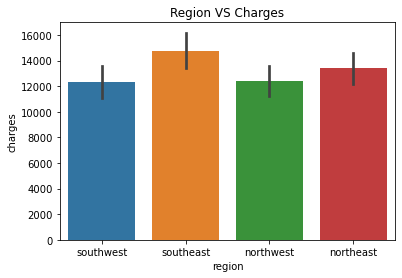

In [5]:
sns.barplot(x='region',y='charges',data=data)
plt.title('Region VS Charges')

Text(0.5, 1.0, 'Childerns VS Charges')

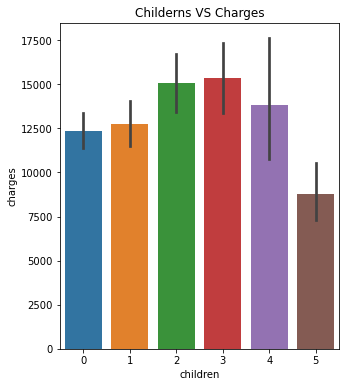

In [6]:
plt.figure(figsize=(5,6))
sns.barplot(x='children',y='charges',data=data)
plt.title('Childerns VS Charges')

# Cleaning the dataset

In [7]:
#changing the labels into int
Smoker=pd.get_dummies(data["smoker"],drop_first=True)
Region=pd.get_dummies(data["region"])
Male=pd.get_dummies(data["sex"],drop_first=True)
Male.head(5)

,male
0,0
1,1
2,1
3,1
4,1


In [8]:
#adding the dummy to original dataset and droping the label
data=pd.concat([data,Smoker,Region,Male],axis=1)
data.drop(['smoker','region','northwest','southwest','sex'],axis=1,inplace=True)
data.head(5)

,age,bmi,children,charges,yes,northeast,southeast,male
0,19,27.900,0,16884.92400,1,0,0,0
1,18,33.770,1,1725.55230,0,0,1,1
2,28,33.000,3,4449.46200,0,0,1,1
3,33,22.705,0,21984.47061,0,0,0,1
4,32,28.880,0,3866.85520,0,0,0,1


In [9]:
data.shape

(1338, 8)

In [10]:
data.isnull().sum()

age          0
bmi          0
children     0
charges      0
yes          0
northeast    0
southeast    0
male         0
dtype: int64

# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [12]:
#assigning the values to input and target 
inputs=data.drop('charges',axis=1)
charges=data['charges']
inputs.head(5)

,age,bmi,children,yes,northeast,southeast,male
0,19,27.900,0,1,0,0,0
1,18,33.770,1,0,0,1,1
2,28,33.000,3,0,0,1,1
3,33,22.705,0,0,0,0,1
4,32,28.880,0,0,0,0,1


In [13]:
##Splitting data for training and testing
Xtrain,Xtest,ytrain,ytest=train_test_split(inputs,charges,test_size=0.2,random_state=1)

In [14]:
#model:
Lr=LinearRegression()
Lr.fit(Xtrain,ytrain)
ypre=Lr.predict(Xtest)

In [15]:
Xtest.shape

(268, 7)

In [16]:
ytest

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
682     40103.89000
629     42983.45850
893     44202.65360
807      2136.88225
1165     5227.98875
Name: charges, Length: 268, dtype: float64

In [17]:
ypre

array([ 4.10680807e+03,  1.26216022e+04,  1.28176644e+04,  1.32852220e+04,
        8.13631091e+02,  3.18530938e+04,  1.29119133e+04,  1.23183865e+04,
        3.78833093e+03,  2.94827705e+04,  1.10251683e+04,  1.77494345e+04,
        8.68734136e+03,  8.60202156e+03,  3.12244410e+03,  1.06988261e+04,
        3.62221931e+03,  7.20712865e+03,  1.50030910e+04,  1.46815072e+04,
        1.25301807e+04,  3.29484947e+04,  8.81906482e+03,  9.24307579e+03,
        3.01579872e+03,  7.91204378e+03,  9.56754297e+03,  1.07411297e+04,
        7.93917890e+03,  4.37922060e+03,  1.43767245e+04,  6.07232443e+03,
        3.46559437e+04,  2.67405356e+04,  3.33745526e+04,  9.28856985e+03,
        3.06517591e+04,  2.69171734e+04,  1.51411213e+04,  3.36366505e+04,
        6.30729774e+03,  1.37881576e+04,  1.07360705e+04,  1.53213980e+04,
        4.45786680e+03,  1.31059946e+04,  4.32957822e+03,  2.86060915e+04,
        7.01630339e+03,  1.42818977e+04,  1.32854596e+04,  1.25849357e+04,
        1.60715226e+03,  

In [18]:
# calculating the mean squared error
mse = np.mean((ytest - ypre)**2, axis = None)

In [19]:
# Calculating the root mean squared error
rmse = np.sqrt(mse)

In [20]:
# Calculating the r2 score
r2 = r2_score(ytest, ypre)

In [21]:
#result
print('MSE:',mse)
print('RMSE:',rmse)
print('R2 score:',r2*100)

MSE: 35568780.716343656
RMSE: 5963.956800341838
R2 score: 76.17321254167256


# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [23]:
#assigning variables to dependent and independend values

inputs=data.drop('charges',axis=1)
charges=data['charges']
charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [24]:
##Splitting data for training and testing
Xtrain,Xtest,ytrain,ytest=train_test_split(inputs,charges,test_size=0.3,random_state=1)

In [25]:
#model:
model=DecisionTreeRegressor()
model.fit(Xtrain,ytrain)
ypred=model.predict(Xtest)

In [26]:
#Calculation:
mse = np.mean((ytest - ypred)**2, axis = None)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

In [27]:
#result
print('MSE:',mse)
print('RMSE:',rmse)
print('R2 score:',r2*100)

MSE: 40030145.8649413
RMSE: 6326.93811135697
R2 score: 71.75339708408124


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [29]:
#assigning variables to dependent and independend values

inputs=data.drop('charges',axis=1)
charges=data['charges']
charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [30]:
##Splitting data for training and testing
Xtrain,Xtest,ytrain,ytest=train_test_split(inputs,charges,test_size=0.3,random_state=1)

In [31]:
#model:
model=RandomForestRegressor()
model.fit(Xtrain,ytrain)
ypred=model.predict(Xtest)

In [32]:
#Calculation:
mse = np.mean((ytest - ypred)**2, axis = None)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

In [33]:
#result
print('MSE:',mse)
print('RMSE:',rmse)
print('R2 score:',r2*100)

MSE: 23615533.288140927
RMSE: 4859.581595995784
R2 score: 83.33609391061468


# KNN

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
#assigning variables to dependent and independend values

inputs=data.drop('charges',axis=1)
charges=data['charges']
charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [36]:
##Splitting data for training and testing
Xtrain,Xtest,ytrain,ytest=train_test_split(inputs,charges,test_size=0.3,random_state=1)

In [37]:
#Standardising the data to convert the mean into 0 and SD into 1
Sr=StandardScaler()
S_Xtrain=Sr.fit_transform(Xtrain)
S_Xtest=Sr.fit_transform(Xtest)
S_Xtrain

array([[ 0.79715222, -0.70211414, -0.90400228, ..., -0.56254395,
        -0.60038747,  0.97676557],
       [-1.27108519, -0.70375759, -0.08567913, ..., -0.56254395,
        -0.60038747, -1.02378711],
       [-0.98581107, -0.73333977, -0.90400228, ...,  1.77763888,
        -0.60038747,  0.97676557],
       ...,
       [ 0.86847075,  0.70303946,  0.73264401, ...,  1.77763888,
        -0.60038747, -1.02378711],
       [ 0.0839669 , -1.39072157,  0.73264401, ..., -0.56254395,
         1.66559105, -1.02378711],
       [ 1.29638193, -0.4506656 , -0.08567913, ..., -0.56254395,
         1.66559105,  0.97676557]])

In [38]:
# knn model and prediction
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(S_Xtrain,ytrain)
ypre=knn.predict(S_Xtest)

In [39]:
#Calculation:
mse = np.mean((ytest - ypre)**2, axis = None)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypre)

In [40]:
#result
print('MSE:',mse)
print('RMSE:',rmse)
print('R2 score:',r2*100)

MSE: 29599020.6668095
RMSE: 5440.498200239524
R2 score: 79.11394611710175


# Support Vector Machine

In [41]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [42]:
#assigning the values to input and target 
X=data.drop('charges',axis=1)
y=data['charges']
X.head(5)

,age,bmi,children,yes,northeast,southeast,male
0,19,27.900,0,1,0,0,0
1,18,33.770,1,0,0,1,1
2,28,33.000,3,0,0,1,1
3,33,22.705,0,0,0,0,1
4,32,28.880,0,0,0,0,1


In [43]:
##Splitting data for training and testing
Xtrain,Xtest,y_train,y_test=train_test_split(inputs,charges,test_size=0.2,random_state=1)

In [44]:
#Model
model=SVR()
model.fit(Xtrain,y_train)
ypred=model.predict(Xtest)

In [45]:
#Calculation:
mse = np.mean((y_test - ypred)**2, axis = None)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ypred)

In [46]:
#result
print('MSE:',mse)
print('RMSE:',rmse)
print('R2 score:',r2*100)

MSE: 166558631.96321929
RMSE: 12905.759643012854
R2 score: -11.574168223143054


Inference:

Among all the algorithms we got least rmse on Random Forest with score on 83%

Second most algorithm performed well is KNN with score 79%